# Supervised Machine Learning
* K-Nearest Neighbors
* Linear Models
    * Linear Regression
    * Ridge
    * Lasso

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

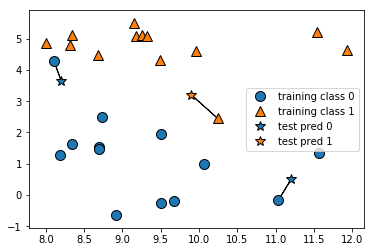

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

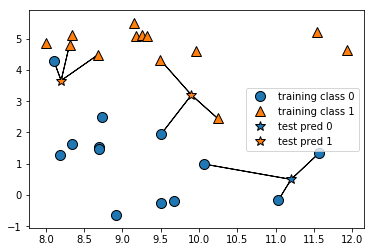

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

## K-nearest neighbors

### Forge dataset example (made-up)

In [4]:
#Import the data splitter and the Estimator class for this algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Call the forge dataset and split it into training and testing
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Create an instance of the class
clf = KNeighborsClassifier(n_neighbors = 3)

#Fit the classifier
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [5]:
print("Test set predictions: ", clf.predict(X_test))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions:  [1 0 1 0 1 0 0]
Test set accuracy: 0.86


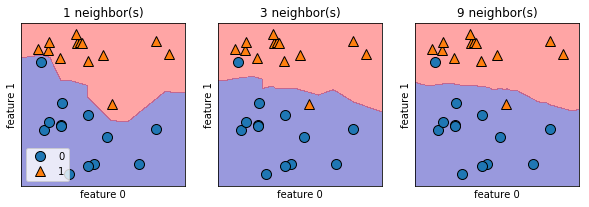

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (10,3))

#Graph the regions that belong to each of the two classes in forge dataset
for n_neighbors, ax in zip([1,3,9], axes):
    #The fit method returns the object self, so we can instantiate
    #And fit in one line
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps = 0.5, ax=ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

### Breast cancer example (real world)

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print("Target names: ", cancer['target_names'])
print("\nFeatures: ", cancer["feature_names"])
print("\nDescription:", cancer['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Target names:  ['malignant' 'benign']

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Description: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - ra

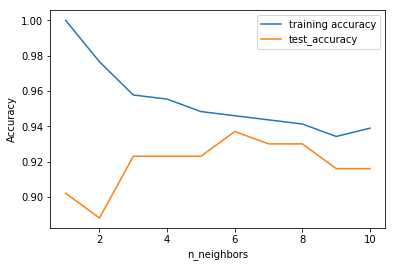

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'],
                                                    stratify = cancer['target'], random_state=66)

training_accuracy = []
test_accuracy = []
#Try n_neighbors from 1 to 10
neighbors_settings= range(1,11)

for n_neighbors in neighbors_settings:
    # Call the estimator class
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train, y_train)
    #Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    #Recrd generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
#Plot it :v
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label ="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

### K-neighbors regressions
It is implemented using the KNeighborsRegressor class in scikit-learn

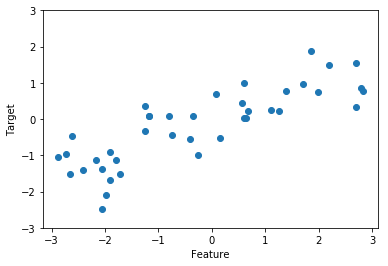

In [9]:
# Load the waves data set
X,y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

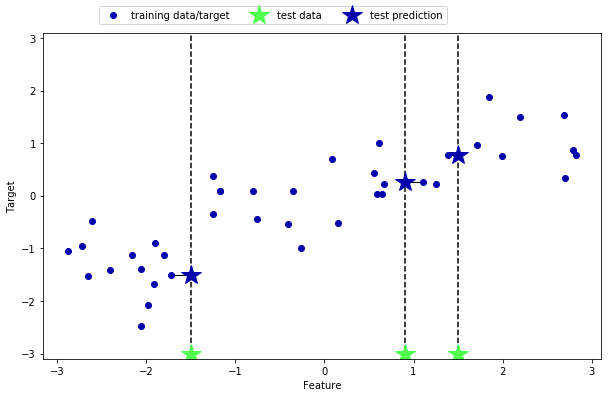

In [10]:
# Plot a sample predictions graph with a single closest neighbor
mglearn.plots.plot_knn_regression(n_neighbors = 1)

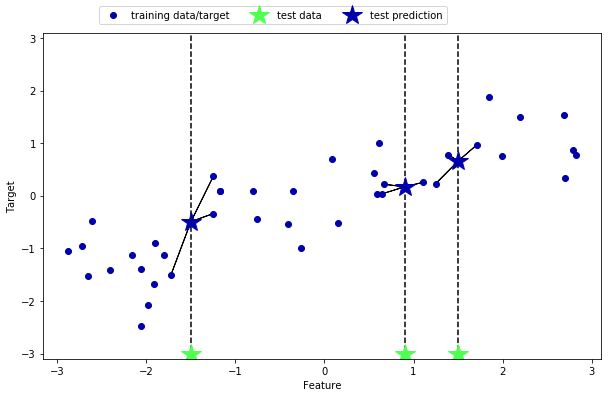

In [11]:
# Plot a sample prediction graph with several closest neighbors
mglearn.plots.plot_knn_regression(n_neighbors = 3
                                 )

In [12]:
# Import the Estimator class
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

#Instantiate the model and set number of neighbors to 3 and fit the model
reg = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)


In [13]:
# Make predictions on the test set:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


#### Note:
Regression models use R^2 to calculate the goodness of a prediction. A value of 1 correspondes to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses (y_train)

In [14]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Now we can visualize how the predictions of the model look.

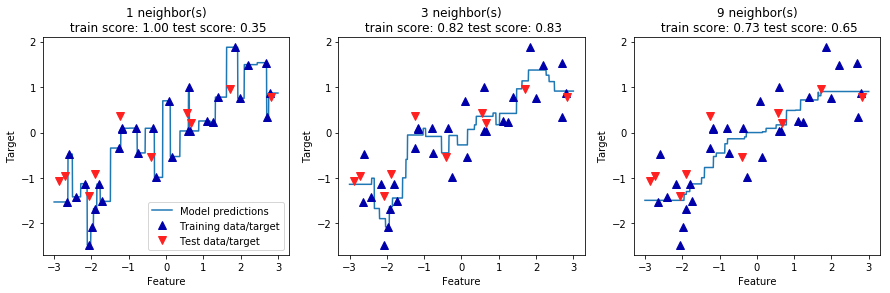

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

## Linear Models

w[0]: 0.393906  b: -0.031804


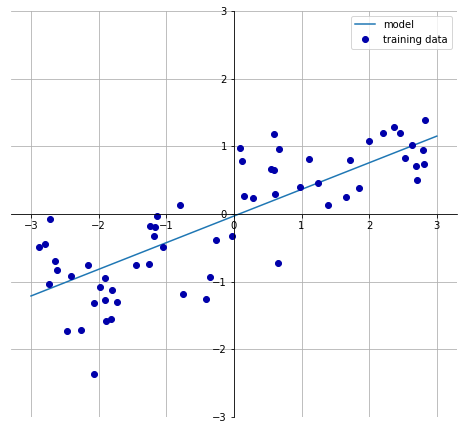

In [16]:
#Plot a linear Regression model with the wave dataset
mglearn.plots.plot_linear_regression_wave()

### Linear Regression (aka Ornidary Least Squares)

#### Apply it on the waves dataset

In [17]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)

print("lr.coef_: ", lr.coef_)
print("lr.intercept_: ", lr.intercept_)

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


In [18]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


#### Apply it on the boston housing extended

In [22]:
#Load the dataset
X, y = mglearn.datasets.load_extended_boston()

#Split it
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

print("\nLinear Regression coefficients: ", lr.coef_)

Training set score: 0.95
Test set score: 0.61

Linear Regression coefficients:  [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.197275

The difference between the two R^2 is caused by overfitting, as the training set is composed of over 100 features

### Ridge regression

Instead of just considering the least square differences, it also makes the coefficients as small as possible in an effort to avoid overfitting.

In [23]:

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print("\nRidge coefficients: ", ridge.coef_)

Training set score: 0.89
Test set score: 0.75

Ridge coefficients:  [-1.41368408e+00 -1.55661895e+00 -1.46543409e+00 -1.26616071e-01
 -7.91193605e-02  8.33161023e+00  2.54975060e-01 -4.94145701e+00
  3.89862268e+00 -1.05866058e+00 -1.58433734e+00  1.05103856e+00
 -4.01220799e+00  3.33720475e-01  3.64725471e-03 -8.49295793e-01
  7.44989267e-01 -1.43106836e+00 -1.62981017e+00 -1.40486294e+00
 -4.47314366e-02 -1.74619880e+00 -1.46715888e+00 -1.33237111e+00
 -1.69154625e+00 -5.06179637e-01  2.62197591e+00 -2.09210002e+00
  1.95074661e-01 -2.75469422e-01  5.11308202e+00 -1.67083739e+00
 -9.81863179e-02  6.34477127e-01 -6.10008281e-01  4.01805897e-02
 -1.27661999e+00 -2.91349679e+00  3.39544035e+00  7.91904036e-01
  1.35260232e+00 -4.03661265e+00  2.32361734e+00 -3.36712926e+00
  1.81279204e+00  3.01566897e+00 -1.89452070e+00 -2.50844073e-01
 -2.89543735e+00 -1.26616071e-01 -5.00217192e+00 -2.43951806e+00
  2.85071846e+00 -8.57081177e-01  2.99141960e+00  2.34589755e+00
  1.31207081e+00  1.71

#### Notes:
How much importance the model places on simplicity vs training set performance can be specified by the user, using the alpha parameter.

High values of alpha restricts more the coefficients and restricts their values to zero. This decreases training set performance but MIGHT help generalization.

Low values of alpha makes the model be more similar to a normal Linear Regression as coefficientes are barely restricted. Better performance in training set but generalization MIGHT be affected.

In [24]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

print("\nRidge coefficients: ", ridge10.coef_)

Training set score: 0.79
Test set score: 0.64

Ridge coefficients:  [-8.11609631e-01  6.47608896e-01 -8.09783229e-01  3.11334709e-01
 -6.84623747e-01  4.38797575e+00 -1.47554474e-01 -2.44214065e+00
  8.45915099e-01 -1.14727508e+00 -2.33162040e+00  1.06787015e+00
 -3.98391025e+00 -5.98636976e-01  2.93228193e-03 -5.21253823e-01
  1.40339673e-01 -6.45256057e-01 -7.61400539e-01 -7.47231171e-01
 -3.86298005e-02 -8.29808059e-01 -7.52859756e-01 -6.75605899e-01
 -8.72001488e-01 -3.23330640e-01  1.27336327e+00 -3.37279550e-01
  6.30682038e-02  2.37092897e-01  2.09805607e+00  1.00996768e-01
 -2.79529662e-01  1.73222619e-01 -3.33557850e-01 -3.74226653e-01
  6.98414808e-01 -6.96284918e-01  7.79521010e-01  3.74843210e-01
 -6.24101244e-01 -7.63657605e-01  4.35756439e-02 -1.04000852e+00
  4.24401576e-01  4.78687021e-01 -3.84125445e-01 -9.93802653e-02
 -1.30226356e+00  3.11334709e-01 -5.92097637e-01  6.33816542e-01
  6.66792895e-01 -1.27959944e-01  1.35346930e+00  1.09839246e+00
  6.37100148e-01  4.76

In [26]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

print("\nRidge coefficients: ", ridge01.coef_)

Training set score: 0.93
Test set score: 0.77

Ridge coefficients:  [-2.33300720e+00 -5.44192850e+00 -6.12865463e+00 -7.78524693e-01
  1.29152995e+00  1.90222839e+01  4.35864731e+00 -1.11911067e+01
  9.55539672e+00 -7.48671406e-01 -5.33307088e-01  6.23384946e+00
 -2.72886731e+00  5.86117121e+00  2.28233711e-02 -9.01608311e-01
  4.66756441e+00 -3.37983354e+00  1.31611460e+00 -3.48895554e+00
  4.41536215e-01 -3.51941085e+00 -2.52222659e+00 -2.69562070e+00
  2.44649480e-01 -1.02306604e+00  3.04223584e+00 -2.68804128e+00
  4.28396019e+00 -2.94109311e+00  8.70934702e+00 -3.13683472e+00
 -2.91608183e-01  2.17487375e+00  3.62658111e+00  2.30047840e+00
 -2.83789461e+00 -6.17207969e+00  7.94858912e+00  1.65631996e+00
  8.72779643e+00  1.08042552e+00  5.72208008e+00 -4.76401068e+00
  5.07461001e+00  8.01603635e+00 -8.44254041e+00 -6.44526450e-01
 -1.42288399e+01 -7.78524693e-01 -1.38982595e+01 -1.59298479e+01
  6.42600904e+00 -1.85273659e+00  6.37949850e+00  4.03122648e+00
 -9.48053011e-01  1.11

Plot to compare the coefficientes of Ridge =1, 10 and 0.1

LinearRegression coefficients tend to be larger than those of the Ridge model

Also, the higher the Ridge alpha, the lower the magnitude of the coefficients

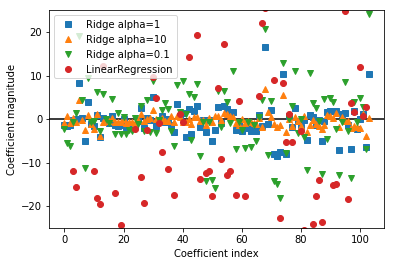

In [28]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

The next raph shows that with more data the model tends to predict better in both the ridge and linear regressions. With enough data both models will predict jus as good.

Linear regression tends to have a better training score as it is not restricted, but it performs badly on the testing as it overfits, specially with few samples in the data.

This is modeled with alpha= 1 in Ridge. The graph shows that with an increasing sie in data, regularization becomes less important.

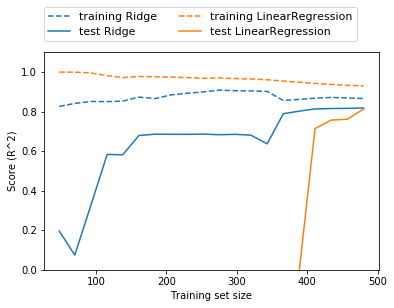

In [30]:
#Training curves for ridge regression and linear regression on the Boston Housing extended dataset
mglearn.plots.plot_ridge_n_samples()

### Lasso Regression

An alternative for ridge for regularization.

This one uses L1 norm of the coefficient vector. It penalizes the sum of the absolute values of the coefficients.

The consequence of this is that sometimes some coefficients are EXACTLY zero. This can be seen as an automatic feature selection, as it leaves only the most important features of the model.

In [32]:
from sklearn.linear_model import Lasso

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

print("Number of features used: ", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used:  4


Lasso underfitted and used only 4 of the 104 features. Lasso has the regularization parameter alpha too.

High values of alpha restricts more the coefficients and restricts their values closer to zero. This decreases training set performance but MIGHT help generalization.

Low values of alpha makes the model be more similar to a normal Linear Regression as coefficientes are barely restricted. Better performance in training set but generalization MIGHT be affected.

In this case if we decrease alpha, we need to increase max_iter (the maximum number of iterations to run).

In [33]:
# We increase the default setting of "max_iter",
#Otherwise the model would warn use we should increase max_iter.

lasso001 = Lasso(alpha= 0.001, max_iter = 100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))

print("Number of features used: ", np.sum(lasso001.coef_ != 0))

Training set score: 0.94
Test set score: 0.74
Number of features used:  67


If we set alpha too low then we might end up overfitting

In [34]:
# We increase the default setting of "max_iter",
#Otherwise the model would warn use we should increase max_iter.

lasso00001 = Lasso(alpha= 0.0001, max_iter = 100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))

print("Number of features used: ", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used:  96


Again, the higher the alpha, the lower the coefficients. In alpha= 1 most coefficients are equal to zero

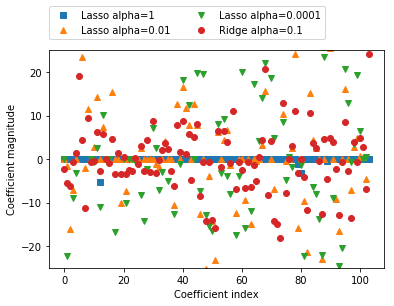

In [35]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()